In [3]:
#importing required libs
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, kruskal
sys.path.append(os.path.abspath("../")) 
from src.utils.utils import *


In [6]:
# Step 1: Load and clean all 3 countries
COUNTRIES = {
    "Benin": "../data/benin-malanville.csv",
    "sierraleone": "../data/sierraleone-bumbuna.csv",
    "Togo": "../data/togo-dapaong_qc.csv",
}
KEY_METRICS = ["GHI", "DNI", "DHI"]
dataframes = []

for country, path in COUNTRIES.items():
    df = load_data(path)
    df = clean_data(df, KEY_METRICS)
    df["Country"] = country
    dataframes.append(df)

# Combine all for visualizations
combined_df = pd.concat(dataframes, ignore_index=True)


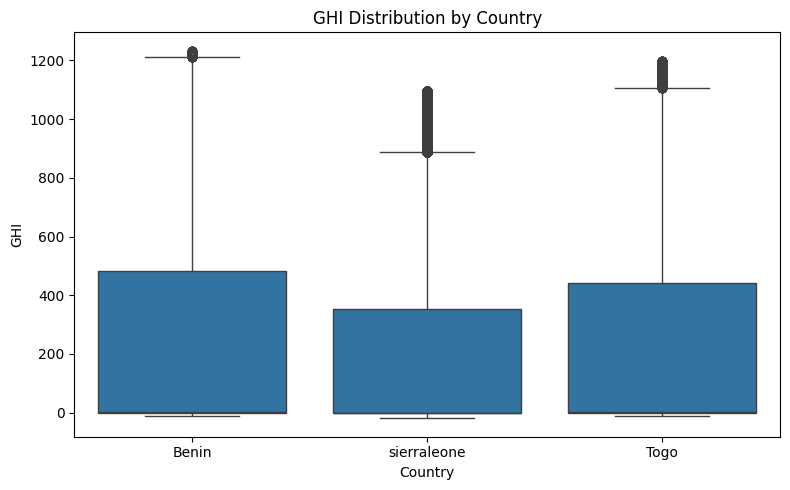

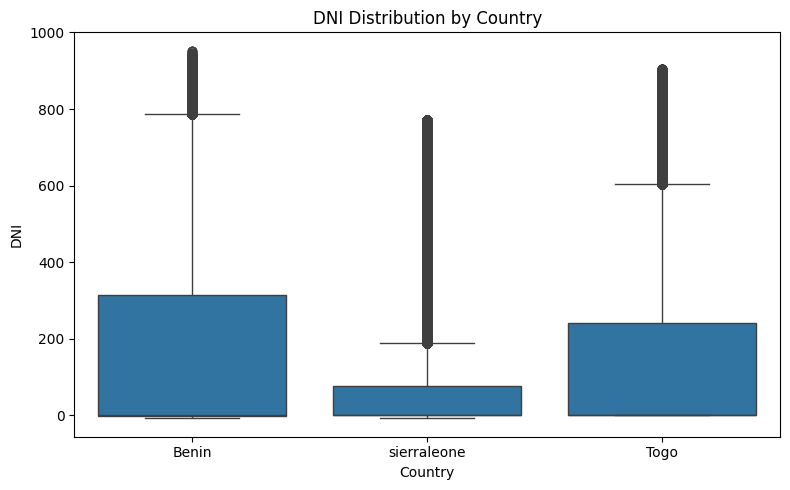

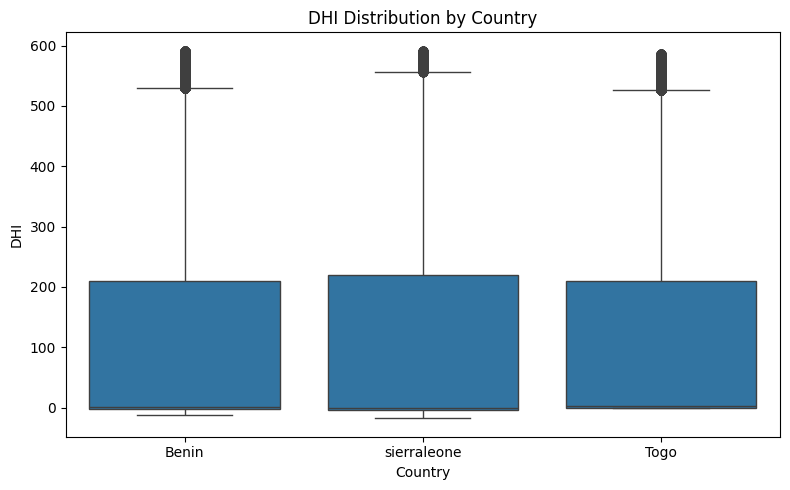

In [7]:
# Step 2: Boxplots for each metric
for metric in KEY_METRICS:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=combined_df, x="Country", y=metric)
    plt.title(f"{metric} Distribution by Country")
    plt.tight_layout()
    plt.show()

In [8]:
# Step 3: Summary table (mean, median, std)
summary_stats = combined_df.groupby("Country")[KEY_METRICS].agg(['mean', 'median', 'std'])
print("\n=== Summary Table ===")
print(summary_stats)


=== Summary Table ===
                    GHI                            DNI                     \
                   mean median         std        mean median         std   
Country                                                                     
Benin        240.342811    1.8  330.868308  167.187516   -0.1  261.710501   
Togo         229.831878    2.0  321.643788  149.368966    0.0  248.554496   
sierraleone  196.440576    0.0  291.236243  104.527217   -0.1  201.696328   

                    DHI                     
                   mean median         std  
Country                                     
Benin        110.899160    0.5  152.922463  
Togo         112.404125    1.8  151.296253  
sierraleone  110.107836   -0.4  154.171728  


In [ ]:
# Step 4: One-way ANOVA or Kruskal-Wallis test (GHI)
benin_ghi = combined_df[combined_df["Country"] == "Benin"]["GHI"]
ghana_ghi = combined_df[combined_df["Country"] == "Ghana"]["GHI"]
togo_ghi = combined_df[combined_df["Country"] == "Togo"]["GHI"]

In [ ]:
# Use ANOVA
f_stat, p_val = f_oneway(benin_ghi, ghana_ghi, togo_ghi)
print("\n[ANOVA Test on GHI]")
print(f"F-statistic: {f_stat:.3f}, p-value: {p_val:.4f}")

In [ ]:
# Step 5: Bar chart of average GHI
avg_ghi = combined_df.groupby("Country")["GHI"].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_ghi, x="Country", y="GHI")
plt.title("Average GHI by Country")
plt.tight_layout()
plt.show()